In [49]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8899eb03-3414-400d-81f4-debad6f17177',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-24T16:47:28.228Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9931}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9633, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [50]:
type(data)

dict

In [51]:
import pandas as pd

# Allows to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [52]:
# This normalizes the data and makes it more presentable in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102100.00000,19102100.00000,NaN,1,NaN,NaN,None,2022-07-24T16:47:00.000Z,22725.50610,23288138919.67895,0.13330,-0.43141,2.06468,7.47269,8.51246,-22.99492,-42.53770,434104890019.96661,41.62870,477235628041.90997,None,2022-07-24T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121680252.74900,121680252.74900,NaN,2,NaN,NaN,None,2022-07-24T16:46:00.000Z,1594.08549,16418051143.48819,9.98440,-0.80701,4.40495,18.34918,33.61931,-18.30845,-45.46253,193968724886.33417,18.60490,193968724886.32999,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
2,825,Tether,USDT,tether,36590,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277710.53098,68166976392.72330,NaN,3,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00003,41741916018.50020,0.33610,0.00156,0.00055,0.03333,0.07304,0.10811,-0.03356,65843194846.01601,6.31690,68168961246.81000,None,2022-07-24T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 16:47:36.337513
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55096167028.30013,55096167028.30013,NaN,4,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00002,5019727659.97931,-8.19100,-0.01031,0.00674,0.00695,-0.02160,-0.01299,-0.16842,55097495983.01189,5.28430,55097495983.01000,None,2022-07-24T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 16:47:36.337513
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-24T16:46:00.000Z,262.92452,944331819.91523,-15.12290,-0.58057,2.25509,4.84378,12.03207,-19.14075,-34.11297,42419521887.04375,4.06840,52584903946.50000,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
5,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,None,2022-07-24T16:46:00.000Z,0.52318,1072208056.76290,62.10800,-0.45723,7.86858,16.55301,6.68653,2.55181,-40.15154,17753600669.49883,1.70290,23543080406.40000,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-24T16:47:00.000Z,0.36350,916826105.28661,3.46850,-0.83061,2.25076,4.24727,1.52870,-9.50742,-46.33394,17572693098.18579,1.68540,36349949968.20000,None,2022-07-24T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
7,4687,Binance USD,BUSD,binance-usd,4143,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,8,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00011,4644575458.13752,-5.99760,0.16087,-0.09400,0.08126,0.03085,-0.02769,0.00964,17549095288.01314,1.68360,17549095288.01000,None,2022-07-24T16:46:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 16:4

In [53]:
def api_runner():  #call function
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # call API
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {                                                                 # use key
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '8899eb03-3414-400d-81f4-debad6f17177',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df= df.append(df2)

    if not os.path.isfile(r'/Users/gregorygreen/API.csv'):                          # append data to a csv: in case of computer shutdown
        df.to_csv(r'/Users/gregorygreen/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/gregorygreen/API.csv', mode='a', header=False)

In [55]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


/Users/gregorygreen/Library/Python/3.8/lib/python/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_29052/1371165506.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(df2)


API Runner completed successfully


KeyboardInterrupt: 

In [56]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102100.00000,19102100.00000,NaN,1,NaN,NaN,None,2022-07-24T16:47:00.000Z,22725.50610,23288138919.67895,0.13330,-0.43141,2.06468,7.47269,8.51246,-22.99492,-42.53770,434104890019.96661,41.62870,477235628041.90997,None,2022-07-24T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121680252.74900,121680252.74900,NaN,2,NaN,NaN,None,2022-07-24T16:46:00.000Z,1594.08549,16418051143.48819,9.98440,-0.80701,4.40495,18.34918,33.61931,-18.30845,-45.46253,193968724886.33417,18.60490,193968724886.32999,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
2,825,Tether,USDT,tether,36590,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277710.53098,68166976392.72330,NaN,3,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00003,41741916018.50020,0.33610,0.00156,0.00055,0.03333,0.07304,0.10811,-0.03356,65843194846.01601,6.31690,68168961246.81000,None,2022-07-24T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 16:47:36.337513
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55096167028.30013,55096167028.30013,NaN,4,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00002,5019727659.97931,-8.19100,-0.01031,0.00674,0.00695,-0.02160,-0.01299,-0.16842,55097495983.01189,5.28430,55097495983.01000,None,2022-07-24T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 16:47:36.337513
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-24T16:46:00.000Z,262.92452,944331819.91523,-15.12290,-0.58057,2.25509,4.84378,12.03207,-19.14075,-34.11297,42419521887.04375,4.06840,52584903946.50000,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
5,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,None,2022-07-24T16:46:00.000Z,0.52318,1072208056.76290,62.10800,-0.45723,7.86858,16.55301,6.68653,2.55181,-40.15154,17753600669.49883,1.70290,23543080406.40000,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-24T16:47:00.000Z,0.36350,916826105.28661,3.46850,-0.83061,2.25076,4.24727,1.52870,-9.50742,-46.33394,17572693098.18579,1.68540,36349949968.20000,None,2022-07-24T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
7,4687,Binance USD,BUSD,binance-usd,4143,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,8,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00011,4644575458.13752,-5.99760,0.16087,-0.09400,0.08126,0.03085,-0.02769,0.00964,17549095288.01314,1.68360,17549095288.01000,None,2022-07-24T16:46:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 16:4

In [57]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [58]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19102100.00000,19102100.00000,NaN,1,NaN,NaN,None,2022-07-24T16:47:00.000Z,22725.50610,23288138919.67895,0.13330,-0.43141,2.06468,7.47269,8.51246,-22.99492,-42.53770,434104890019.96661,41.62870,477235628041.90997,None,2022-07-24T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121680252.74900,121680252.74900,NaN,2,NaN,NaN,None,2022-07-24T16:46:00.000Z,1594.08549,16418051143.48819,9.98440,-0.80701,4.40495,18.34918,33.61931,-18.30845,-45.46253,193968724886.33417,18.60490,193968724886.32999,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
2,825,Tether,USDT,tether,36590,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65841277710.53098,68166976392.72330,NaN,3,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00003,41741916018.50020,0.33610,0.00156,0.00055,0.03333,0.07304,0.10811,-0.03356,65843194846.01601,6.31690,68168961246.81000,None,2022-07-24T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-24 16:47:36.337513
3,3408,USD Coin,USDC,usd-coin,4938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55096167028.30013,55096167028.30013,NaN,4,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00002,5019727659.97931,-8.19100,-0.01031,0.00674,0.00695,-0.02160,-0.01299,-0.16842,55097495983.01189,5.28430,55097495983.01000,None,2022-07-24T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-24 16:47:36.337513
4,1839,BNB,BNB,bnb,1020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-24T16:46:00.000Z,262.92452,944331819.91523,-15.12290,-0.58057,2.25509,4.84378,12.03207,-19.14075,-34.11297,42419521887.04375,4.06840,52584903946.50000,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
5,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,None,2022-07-24T16:46:00.000Z,0.52318,1072208056.76290,62.10800,-0.45723,7.86858,16.55301,6.68653,2.55181,-40.15154,17753600669.49883,1.70290,23543080406.40000,None,2022-07-24T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-24T16:47:00.000Z,0.36350,916826105.28661,3.46850,-0.83061,2.25076,4.24727,1.52870,-9.50742,-46.33394,17572693098.18579,1.68540,36349949968.20000,None,2022-07-24T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-24 16:47:36.337513
7,4687,Binance USD,BUSD,binance-usd,4143,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,8,NaN,NaN,None,2022-07-24T16:46:00.000Z,1.00011,4644575458.13752,-5.99760,0.16087,-0.09400,0.08126,0.03085,-0.02769,0.00964,17549095288.01314,1.68360,17549095288.01000,None,2022-07-24T16:46:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-24 16:4

In [59]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.49643,2.07047,7.47640,8.35550,-23.05396,-42.56907
Ethereum,-0.88692,4.40876,18.34281,33.43861,-18.36868,-45.50080
Tether,0.00005,0.00070,0.03169,0.07256,0.10701,-0.03159
USD Coin,-0.01666,0.00082,0.00554,-0.02778,-0.01572,-0.14417
BNB,-0.59781,2.30027,4.88375,11.94084,-19.16863,-34.11843
Cardano,-0.57103,7.86371,16.49222,6.49093,2.41976,-40.21833
XRP,-0.84747,2.23871,4.18390,1.35509,-9.65185,-46.36388
Binance USD,0.12406,-0.08243,-0.02381,-0.02127,-0.03923,-0.06615
Solana,-0.71818,1.64999,4.75873,2.34519,-14.94698,-58.63351


In [60]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.49643
             quote.USD.percent_change_24h     2.07047
             quote.USD.percent_change_7d      7.47640
             quote.USD.percent_change_30d     8.35550
             quote.USD.percent_change_60d   -23.05396
             quote.USD.percent_change_90d   -42.56907
Ethereum     quote.USD.percent_change_1h     -0.88692
             quote.USD.percent_change_24h     4.40876
             quote.USD.percent_change_7d     18.34281
             quote.USD.percent_change_30d    33.43861
             quote.USD.percent_change_60d   -18.36868
             quote.USD.percent_change_90d   -45.50080
Tether       quote.USD.percent_change_1h      0.00005
             quote.USD.percent_change_24h     0.00070
             quote.USD.percent_change_7d      0.03169
             quote.USD.percent_change_30d     0.07256
             quote.USD.percent_change_60d     0.10701
             quote.USD.percent_change_90

In [61]:
type(df4)

pandas.core.series.Series

In [62]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.49643
            quote.USD.percent_change_24h   2.07047
            quote.USD.percent_change_7d    7.47640
            quote.USD.percent_change_30d   8.35550
            quote.USD.percent_change_60d -23.05396
            quote.USD.percent_change_90d -42.56907
Ethereum    quote.USD.percent_change_1h   -0.88692
            quote.USD.percent_change_24h   4.40876
            quote.USD.percent_change_7d   18.34281
            quote.USD.percent_change_30d  33.43861
            quote.USD.percent_change_60d -18.36868
            quote.USD.percent_change_90d -45.50080
Tether      quote.USD.percent_change_1h    0.00005
            quote.USD.percent_change_24h   0.00070
            quote.USD.percent_change_7d    0.03169
            quote.USD.percent_change_30d   0.07256
            quote.USD.percent_change_60d   0.10701
            quote.USD.percent_change_90d  -0.03159
USD Coin    quote.USD.percent_change_1h   -0.01666
            quote.USD.percent_change_24h   0.00082
            quote.USD.percent_change_7d    0.00554
            quote.USD.percent_change_30d  -0.02778
            quote.USD.percent_change_60d  -0.01572
            quote.USD.percent_change_90d  -0.14417
BNB         quote.USD.percent_change_1h   -0.59781
            quote.USD.percent_change_24h   2.30027
            quote.USD.percent_change_7d    4.88375
            quote.USD.percent_change_30d  11.94084
            quote.USD.percent_change_60d -19.16863
            quote.USD.percent_change_90d -34.11843
Cardano     quote.USD.percent_change_1h   -0.57103
            quote.USD.percent_change_24h   7.86371
            quote.USD.percent_change_7d   16.49222
            quote.USD.percent_change_30d   6.49093
            quote.USD.percent_change_60d   2.41976
            quote.USD.percent_change_90d -40.21833
XRP         quote.USD.percent_change_1h   -0.84747
            quote.USD.percent_change_24h   2.23871
            quote.USD.percent_change_7d    4.18390
            quote.USD.percent_change_30d   1.35509
            quote.USD.percent_change_60d  -9.65185
            quote.USD.percent_change_90d -46.36388
Binance USD quote.USD.percent_change_1h    0.12406
            quote.USD.percent_change_24h  -0.08243
            quote.USD.percent_change_7d   -0.02381
            quote.USD.percent_change_30d  -0.02127
            quote.USD.percent_change_60d  -0.03923
            quote.USD.percent_change_90d  -0.06615
Solana      quote.USD.percent_change_1h   -0.71818
            quote.USD.percent_change_24h   1.64999
            quote.USD.percent_change_7d    4.75873
            quote.USD.percent_change_30d   2.34519
            quote.USD.percent_change_60d -14.94698
            quote.USD.percent_change_90d -58.63351
Dogecoin    quote.USD.percent_change_1h   -0.41302
            quote.USD.percent_change_24h   1.22802
            quote.USD.percent_change_7d    7.11302
            quote.USD.percent_change_30d   3.62024
            quote.USD.percent_change_60d -17.64822
            quote.USD.percent_change_90d -52.95471
Dai         quote.USD.percent_change_1h   -0.02350
            quote.USD.percent_change_24h   0.00755
            quote.USD.percent_change_7d    0.02836
            quote.USD.percent_change_30d  -0.01676
            quote.USD.percent_change_60d  -0.01943
            quote.USD.percent_change_90d  -0.01543
Polkadot    quote.USD.percent_change_1h   -0.70119
            quote.USD.percent_change_24h   2.23933
            quote.USD.percent_change_7d    6.03562
            quote.USD.percent_change_30d  -8.08116
            quote.USD.percent_change_60d -24.97897
            quote.USD.percent_change_90d -58.37596
Polygon     quote.USD.percent_change_1h   -0.61477
            quote.USD.percent_change_24h   5.07760
            quote.USD.percent_change_7d   17.12326
            quote.USD.percent_change_30d  50.71403
            quote.USD.percent_change_60d  37.04857
            quo

In [63]:
df5.count()

values    90
dtype: int64

In [64]:
# Because of how it's structured above we need to set an index. Do not want to pass a column as an index for this dataframe
# Create a range and pass that as the dataframe. 

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.49643
1,Bitcoin,quote.USD.percent_change_24h,2.07047
2,Bitcoin,quote.USD.percent_change_7d,7.47640
3,Bitcoin,quote.USD.percent_change_30d,8.35550
4,Bitcoin,quote.USD.percent_change_60d,-23.05396
5,Bitcoin,quote.USD.percent_change_90d,-42.56907
6,Ethereum,quote.USD.percent_change_1h,-0.88692
7,Ethereum,quote.USD.percent_change_24h,4.40876
8,Ethereum,quote.USD.percent_change_7d,18.34281
9,Ethereum,quote.USD.percent_change_30d,33.43861


In [65]:
df7=df6.rename(columns={'level_1':
'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.49643
1,Bitcoin,quote.USD.percent_change_24h,2.07047
2,Bitcoin,quote.USD.percent_change_7d,7.47640
3,Bitcoin,quote.USD.percent_change_30d,8.35550
4,Bitcoin,quote.USD.percent_change_60d,-23.05396
5,Bitcoin,quote.USD.percent_change_90d,-42.56907
6,Ethereum,quote.USD.percent_change_1h,-0.88692
7,Ethereum,quote.USD.percent_change_24h,4.40876
8,Ethereum,quote.USD.percent_change_7d,18.34281
9,Ethereum,quote.USD.percent_change_30d,33.43861


In [66]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.49643
1,Bitcoin,24h,2.07047
2,Bitcoin,7d,7.47640
3,Bitcoin,30d,8.35550
4,Bitcoin,60d,-23.05396
5,Bitcoin,90d,-42.56907
6,Ethereum,1h,-0.88692
7,Ethereum,24h,4.40876
8,Ethereum,7d,18.34281
9,Ethereum,30d,33.43861


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

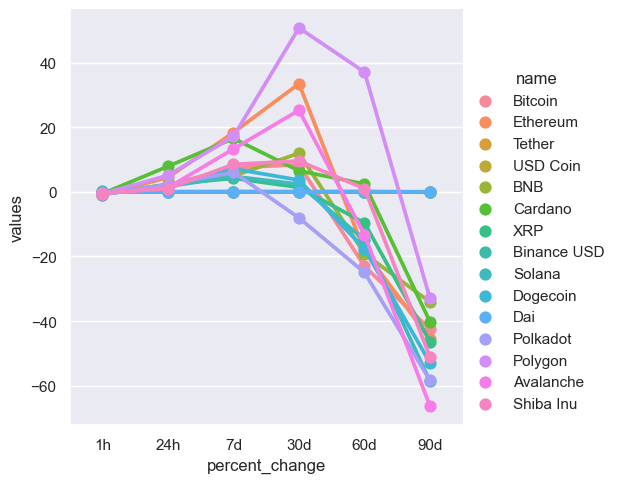

In [68]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')